In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movies.shape

(9125, 3)

In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [7]:
ratings.shape

(100004, 4)

In [8]:
movie_data = pd.merge(ratings,movies,on='movieId')

In [9]:
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama


In [10]:
movie_data.shape

(100004, 6)

Criteria For Popularity Based Recommendation Systems
The criteria is based on:

Movies with the highest rating

Number of views

In [14]:
# Average ratings
ratings_data = movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).round(1)

In [17]:
ratings_data.head()

,rating
title,
Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973),5.0
Alien Escape (1995),5.0
Boiling Point (1993),5.0
Bone Tomahawk (2015),5.0
Borgman (2013),5.0


In [16]:
ratings_data.tail()

,rating
title,
Waterloo Bridge (1940),0.5
Karla (2006),0.5
Ring of Terror (1962),0.5
Road Games (a.k.a. Roadgames) (1981),0.5
Beastmaster 2: Through the Portal of Time (1991),0.5


In [18]:
ratings_data = pd.DataFrame(ratings_data)

In [51]:
# Count of ratings
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

,rating
title,
Forrest Gump (1994),341
Pulp Fiction (1994),324
"Shawshank Redemption, The (1994)",311
"Silence of the Lambs, The (1991)",304
Star Wars: Episode IV - A New Hope (1977),291


In [21]:
ratings_data['ratings_count'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())

In [22]:
ratings_data

,rating,ratings_count
title,,
Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973),5.0,1
Alien Escape (1995),5.0,1
Boiling Point (1993),5.0,1
Bone Tomahawk (2015),5.0,1
Borgman (2013),5.0,1
...,...,...
Waterloo Bridge (1940),0.5,1
Karla (2006),0.5,1
Ring of Terror (1962),0.5,1


In [23]:
ratings_data['ratings_count'].value_counts()

,count
ratings_count,
1,3061
2,1202
3,755
4,550
5,397
...,...
191,1
97,1
137,1


In [31]:
ratings_data = ratings_data.drop(columns='title')

In [32]:
ratings_data

,rating,ratings_count
title,,
Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973),5.0,1
Alien Escape (1995),5.0,1
Boiling Point (1993),5.0,1
Bone Tomahawk (2015),5.0,1
Borgman (2013),5.0,1
...,...,...
Waterloo Bridge (1940),0.5,1
Karla (2006),0.5,1
Ring of Terror (1962),0.5,1


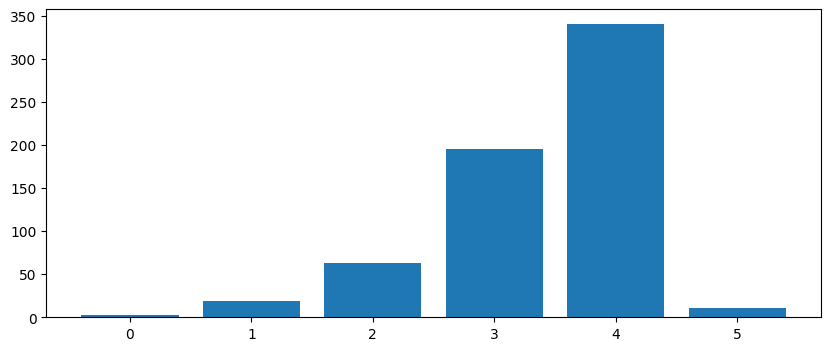

In [35]:
plt.figure(figsize =(10, 4))
plt.bar(ratings_data['rating'].round(),ratings_data['ratings_count'])
plt.show()

Most of the movies are rated between 3 and 4

In [36]:
ratings_mean_count = ratings_data[(ratings_data['rating'] > 3) & (ratings_data['ratings_count'] > 100)]
ratings_mean_count

,rating,ratings_count
title,,
"Godfather, The (1972)",4.5,200
"Shawshank Redemption, The (1994)",4.5,311
"Godfather: Part II, The (1974)",4.4,135
"Usual Suspects, The (1995)",4.4,201
Schindler's List (1993),4.3,244
...,...,...
Home Alone (1990),3.1,129
Dumb & Dumber (Dumb and Dumber) (1994),3.1,158
"Net, The (1995)",3.1,102


In [50]:
ratings_mean_count = ratings_mean_count.sort_values(by='rating',ascending=False).head(15)

In [38]:
ratings_mean_count

,rating,ratings_count
title,,
"Godfather, The (1972)",4.5,200
"Shawshank Redemption, The (1994)",4.5,311
"Godfather: Part II, The (1974)",4.4,135
"Usual Suspects, The (1995)",4.4,201
Schindler's List (1993),4.3,244
One Flew Over the Cuckoo's Nest (1975),4.3,144
Fargo (1996),4.3,224
Pulp Fiction (1994),4.3,324
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),4.2,105


These are the top 15 movies based on user ratings

In [48]:
# Checking for the movies which are rated 5 by the users

ratings_count = ratings_data[(ratings_data['rating'] == 5)].sort_values(by='rating',ascending=False)

In [49]:
ratings_count

,rating,ratings_count
title,,
Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973),5.0,1
"Funhouse, The (1981)",5.0,1
"Grass Is Greener, The (1960)",5.0,1
Gaslight (1940),5.0,1
"Mummy's Ghost, The (1944)",5.0,1
...,...,...
Visions of Light: The Art of Cinematography (1992),5.0,1
Vive L'Amour (Ai qing wan sui) (1994),5.0,1
Voyeur (Abel) (1986),5.0,1
